In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')


# 1. 경제적 요인 분석 결과

## 모델 개요
- **분석 변수**: `monthly_wage`, `employment_rate`, `housing_price_index`, `rental_price_index`
- **Pseudo R-squared (CS)**: 약 33.48% (모델 설명력 중간 수준)

| 변수                  | 계수 (coef) | 해석                                             | p-value |
|-----------------------|-------------|--------------------------------------------------|---------|
| **monthly_wage**      | -8.3981     | 월급이 증가할수록 출산율이 낮아질 가능성이 높음. | 0.062   |
| **employment_rate**   | 6.1124      | 고용률이 증가할수록 출산율이 높아질 가능성이 높음. | 0.059   |
| **housing_price_index** | 1.8942     | 주택 매매 가격 지수가 증가할수록 출산율이 높아질 가능성이 있음. | 0.076   |
| **rental_price_index** | 1.1077     | 전세 가격 지수가 출산율에 유의한 영향을 미치지 않음. | 0.472   |

## 요약
- **monthly_wage**: 월급과 출산율은 부정적 상관관계.
- **employment_rate**: 고용률과 출산율은 긍정적 상관관계.
- **housing_price_index**: 주택 매매 가격은 출산율 증가에 약간 긍정적 영향을 미침.
- **rental_price_index**: 전세 가격은 유의미한 관계를 보이지 않음.

                 Generalized Linear Model Regression Results                  
Dep. Variable:        high_birth_rate   No. Observations:                   36
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.907
Date:                Mon, 16 Dec 2024   Deviance:                       29.814
Time:                        14:45:05   Pearson chi2:                     31.3
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3591
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5468    

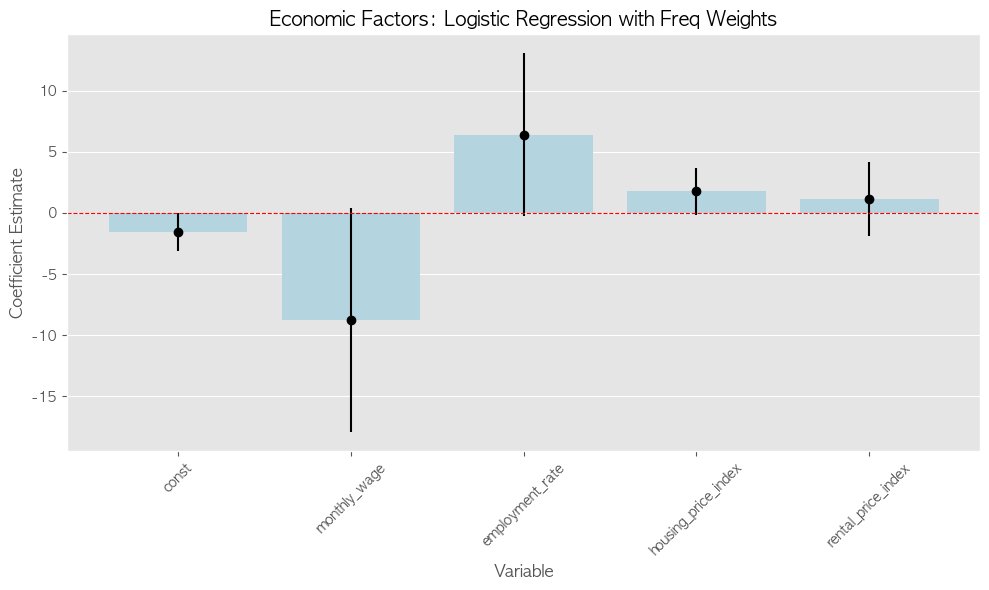

In [32]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv('./cleaned/final_data.csv')  # 'your_data_file.csv'에 파일 경로 입력

# 출산율 이항화 (출산율 > 1.0 → 1, 아니면 0)
data['high_birth_rate'] = (data['birth_rate'] > 1.0).astype(int)

# 경제적 요인 변수 리스트
economic_factors = ['monthly_wage', 'employment_rate', 'housing_price_index', 'rental_price_index']

# 연속형 변수 표준화
scaler = StandardScaler()
data[economic_factors] = scaler.fit_transform(data[economic_factors])

# 독립변수 및 종속변수 정의
X_economic = sm.add_constant(data[economic_factors])  # 상수항 추가
y = data['high_birth_rate']

# 가중치 정의 (출생 건수를 freq_weights로 사용)
freq_weights = data['birth_count']

# `freq_weights`를 적용한 로지스틱 회귀 분석
model_weighted = sm.GLM(y, X_economic, family=sm.families.Binomial()).fit(freq_weights=freq_weights)

# 결과 출력
print(model_weighted.summary())

# 결과 해석 시각화를 위한 데이터 준비
coef = model_weighted.params  # 회귀 계수
conf = model_weighted.conf_int()  # 신뢰 구간
conf['coef'] = coef
conf.columns = ['2.5%', '97.5%', 'coef']

# 시각화: 회귀 계수 및 신뢰 구간
plt.figure(figsize=(10, 6))
sns.barplot(x=conf.index, y='coef', data=conf, color='lightblue')  # 단일 색상 설정
plt.errorbar(x=range(conf.shape[0]), y=conf['coef'], 
             yerr=(conf['coef'] - conf['2.5%'], conf['97.5%'] - conf['coef']),
             fmt='o', color='black')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.title('Economic Factors: Logistic Regression with Freq Weights', fontsize=14)
plt.ylabel('Coefficient Estimate')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 사회적 요인 분석 결과

## 모델 개요
- **분석 변수**: `urbanized_rate`, `edu_index`, `first_marriage_age`
- **Pseudo R-squared (CS)**: 약 28.17% (모델 설명력 중간 수준)

| 변수                  | 계수 (coef) | 해석                                            | p-value |
|-----------------------|-------------|-------------------------------------------------|---------|
| **urbanized_rate**    | -1.6809     | 도시화율이 높을수록 출산율이 낮아질 가능성이 있음. | 0.015   |
| **edu_index**         | 0.7511      | 교육 수준이 높을수록 출산율이 증가할 가능성이 있음. | 0.141   |
| **first_marriage_age**| -0.2420     | 초혼 연령이 출산율에 유의미한 영향을 미치지 않음. | 0.658   |

## 요약
- **urbanized_rate**: 출산율 감소와 강한 부정적 상관관계.
- **edu_index**: 출산율 증가와 약한 긍정적 상관관계를 보이나, 통계적으로 유의미하지 않음.
- **first_marriage_age**: 출산율에 영향을 미치지 않음.

                 Generalized Linear Model Regression Results                  
Dep. Variable:        high_birth_rate   No. Observations:                   36
Model:                            GLM   Df Residuals:                       32
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16.960
Date:                Mon, 16 Dec 2024   Deviance:                       33.920
Time:                        14:06:56   Pearson chi2:                     35.7
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2817
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0102      0

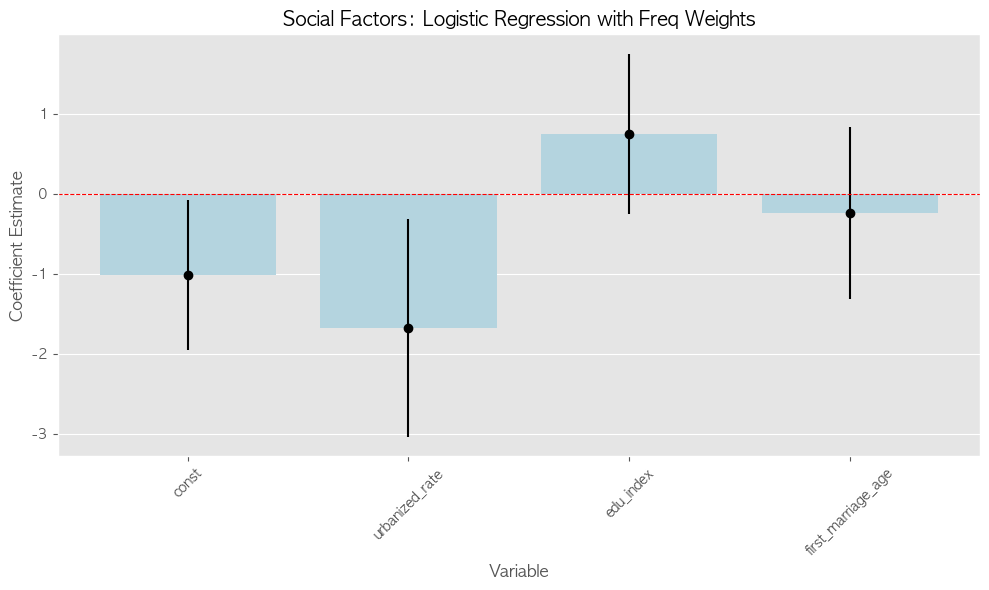

In [27]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv('./cleaned/final_data.csv')  # 'your_data_file.csv'에 파일 경로 입력

# 출산율 이항화 (출산율 > 1.0 → 1, 아니면 0)
data['high_birth_rate'] = (data['birth_rate'] > 1.0).astype(int)

# 사회적 요인 변수 리스트
social_factors = ['urbanized_rate', 'edu_index', 'first_marriage_age']

# 연속형 변수 표준화
scaler = StandardScaler()
data[social_factors] = scaler.fit_transform(data[social_factors])

# 독립변수 및 종속변수 정의
X_social = sm.add_constant(data[social_factors])  # 상수항 추가
y = data['high_birth_rate']

# 가중치 정의 (출생 건수를 freq_weights로 사용)
freq_weights = data['birth_count']

# `freq_weights`를 적용한 로지스틱 회귀 분석
model_social = sm.GLM(y, X_social, family=sm.families.Binomial()).fit(freq_weights=freq_weights)

# 결과 출력
print(model_social.summary())

# 결과 해석 시각화를 위한 데이터 준비
coef = model_social.params  # 회귀 계수
conf = model_social.conf_int()  # 신뢰 구간
conf['coef'] = coef
conf.columns = ['2.5%', '97.5%', 'coef']

# 시각화: 회귀 계수 및 신뢰 구간
plt.figure(figsize=(10, 6))
sns.barplot(x=conf.index, y='coef', data=conf, color='lightblue')  # 단일 색상 설정
plt.errorbar(x=range(conf.shape[0]), y=conf['coef'], 
             yerr=(conf['coef'] - conf['2.5%'], conf['97.5%'] - conf['coef']),
             fmt='o', color='black')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.title('Social Factors: Logistic Regression with Freq Weights', fontsize=14)
plt.ylabel('Coefficient Estimate')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 종합 요약

## 1. 경제적 요인
- **월급 (monthly_wage)**: 출산율 감소와 관련 있음.
- **고용률 (employment_rate)** 및 **주택 매매 가격 (housing_price_index)**: 출산율 증가에 긍정적 영향을 미칠 가능성이 있음.

## 2. 사회적 요인
- **도시화율 (urbanized_rate)**: 출산율 감소에 가장 중요한 사회적 요인.
- **교육 수준 (edu_index)**: 출산율 증가 경향이 있으나, 통계적으로 유의하지 않음.

## 3. 정책적 시사점
### 경제적 요인:
- 고용 안정성을 강화하고, 주택 구매 관련 정책을 지원하는 것이 출산율에 긍정적 기여 가능.
### 사회적 요인:
- 도시화율 증가로 인한 출산율 감소를 완화하기 위한 지원 정책(주거 비용 감소, 육아 지원 등) 필요.

# 분석의 주요 한계점

## 1. 다중공선성 문제 (VIF 문제)
- **경제적 요인과 사회적 요인을 합쳐서 분석 시 문제**:
  - 특정 변수 간 높은 상관성으로 인해 다중공선성 문제가 발생.
  - 예: `employment_rate`와 `urbanized_rate`, `monthly_wage`와 `first_marriage_age`.
  - 다중공선성은 모델의 계수 추정치를 왜곡시키고, 해석의 신뢰성을 저하시킴.
- **해결**:
  - VIF가 높은 변수를 제거하거나 차원 축소(PCA)를 적용했으나, 상호작용 효과와 종합적 관계 해석이 어려움.

## 2. 데이터 크기의 제한
- **적은 데이터 수**:
  - 데이터 크기: **36개 관측치**.
  - 데이터가 적어 변수 간 관계를 충분히 탐구하거나 복잡한 상호작용 효과를 분석하기 어려움.
  - 통계적 검정의 신뢰도가 낮아지고, p-value가 높은 결과 발생 가능성 증가.
- **예**:
  - `housing_price_index`, `edu_index`는 경향성을 보였으나 유의미하지 않음.
  - 적은 데이터로 인해 중요한 변수의 영향력이 과소평가될 가능성.

## 3. 경제적 요인과 사회적 요인을 합쳐서 분석할 경우 해석의 복잡성
- **합쳐 분석의 문제**:
  - 변수 간 상호작용 효과를 분석하기 어려움.
  - 해석이 복잡해지고, 상관성이 높은 변수를 제거하면 실제 중요한 효과를 놓칠 가능성.
- **예**:
  - `employment_rate`와 `edu_index`는 상호작용 가능성이 있지만, 이를 포함하지 않으면 분석 결과가 제한적.

## 4. 변수의 선택 및 제거 기준
- **변수 제거의 임의성**:
  - VIF와 p-value를 기준으로 변수 제거 시 중요한 변수(`employment_rate`, `rental_price_index`)가 모델에서 제외됨.
  - 변수 간 상관성이 높은 경우 대표 변수를 선택하는 과정에서 본질적인 정보 손실 가능성.

## 5. 데이터의 시간적/공간적 제약
- **지역적/시간적 특성 반영 부족**:
  - 특정 지역과 시점에 제한된 데이터로 결과가 일반화되기 어려움.
  - 지역별, 연도별 차이를 고려하지 못해 국소적 특성만 반영.
- **동적 요인 미반영**:
  - 경제적 요인과 사회적 요인은 시간이 지남에 따라 변동성이 크지만, 단일 시점 데이터는 장기적 경향을 반영하지 못함.
  - 예: 출산율은 경제적/사회적 충격에 민감하지만, 이를 반영하지 못함.

## 6. 상호작용 효과 탐구의 부재
- **경제적 요인과 사회적 요인 간 상호작용 효과를 분석하지 않음**:
  - 예: `employment_rate`와 `edu_index`의 복합적인 영향을 탐구하지 못함.
  - 합쳐 분석 시 상호작용 항목을 추가하면 해석 가능하지만, 다중공선성 문제로 인해 제한적.

---

# 개선 방향

## 1. 데이터 크기 확대
- 더 많은 관측치를 수집하여 통계적 검정의 신뢰성을 높이고, 상호작용 효과를 탐구할 수 있도록 데이터 강화.

## 2. 상호작용 효과 포함
- 변수 간 상호작용을 고려한 모델링을 수행하여 종합적 해석을 제공.

## 3. 다중공선성 완화
- PCA 또는 LASSO 회귀와 같은 차원 축소 기법을 적용.

## 4. 시간적/공간적 데이터 추가
- 연도별 또는 지역별 데이터를 포함해 출산율 변화의 맥락을 탐구.